In [94]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Download T-Note from Yahoo Finance**

In [95]:
start_date = "1970-01-01"
end_date = "2024-12-31"

#下载标普500数据
ticker_sp500 = "^GSPC"
#下载T-Note 10Y数据
ticker_TNOTE = "^TNX"


In [96]:
SP500_DF = yf.download(ticker_sp500, start=start_date, end=end_date)
TNOTE_DF = yf.download(ticker_TNOTE, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [97]:
#SP500_DF.to_csv("../data/raw/SP500_1970.csv")
#TNOTE_DF.to_csv("../data/raw/TNOTE.csv")

In [98]:
TNOTE_DF

Price,Close,High,Low,Open,Volume
Ticker,^TNX,^TNX,^TNX,^TNX,^TNX
Date,,,,,
1970-01-02,7.860,7.860,7.860,7.860,0
1970-01-05,7.880,7.880,7.880,7.880,0
1970-01-06,7.960,7.960,7.960,7.960,0
1970-01-07,7.990,7.990,7.990,7.990,0
1970-01-08,7.960,7.960,7.960,7.960,0
...,...,...,...,...,...
2024-12-23,4.599,4.599,4.534,4.550,0
2024-12-24,4.591,4.629,4.583,4.609,0


**Process SP500 and AGG data**

In [99]:
sp500_daily = pd.read_excel("../data/raw/SP500.xlsx", sheet_name="Daily")
sp500_daily.columns = sp500_daily.iloc[4]
sp500_daily = sp500_daily.iloc[5:]
sp500_daily.columns.name = None
sp500_daily.reset_index(drop=True, inplace=True)
sp500_daily.set_index("Dates", inplace=True)
sp500_daily = sp500_daily.dropna(subset=['PX_LAST'])
sp500_daily['SPXret_1d'] = sp500_daily['PX_LAST'].pct_change()

sp500_quarterly = pd.read_excel("../data/raw/SP500.xlsx", sheet_name="Quarterly")
sp500_quarterly.columns = sp500_quarterly.iloc[4]
sp500_quarterly = sp500_quarterly.iloc[5:]
sp500_quarterly.columns.name = None
sp500_quarterly.reset_index(drop=True, inplace=True)
sp500_quarterly.set_index("Dates", inplace=True)
sp500_quarterly = sp500_quarterly.dropna(subset=['PX_LAST'])
sp500_quarterly['SPXret_1q'] = sp500_quarterly['PX_LAST'].pct_change()

sp500_semi_annual = pd.read_excel("../data/raw/SP500.xlsx", sheet_name="Semi Annually")
sp500_semi_annual.columns = sp500_semi_annual.iloc[4]
sp500_semi_annual = sp500_semi_annual.iloc[5:]
sp500_semi_annual.columns.name = None
sp500_semi_annual.reset_index(drop=True, inplace=True)
sp500_semi_annual.set_index("Dates", inplace=True)
sp500_semi_annual = sp500_semi_annual.dropna(subset=['PX_LAST'])
sp500_semi_annual['SPXret_s'] = sp500_semi_annual['PX_LAST'].pct_change()

sp500_annual = pd.read_excel("../data/raw/SP500.xlsx", sheet_name="Yearly")
sp500_annual.columns = sp500_annual.iloc[4]
sp500_annual = sp500_annual.iloc[5:]
sp500_annual.columns.name = None
sp500_annual.reset_index(drop=True, inplace=True)
sp500_annual.set_index("Dates", inplace=True)
sp500_annual = sp500_annual.dropna(subset=['PX_LAST'])
sp500_annual['SPXret_a'] = sp500_annual['PX_LAST'].pct_change()

In [100]:
AGG_quarterly = pd.read_excel("../data/raw/AGG_new.xlsx", sheet_name="Quarterly")
AGG_quarterly.columns = AGG_quarterly.iloc[4]
AGG_quarterly = AGG_quarterly.iloc[5:]
AGG_quarterly.columns.name = None
AGG_quarterly.reset_index(drop=True, inplace=True)
AGG_quarterly.set_index("Dates", inplace=True)
AGG_quarterly = AGG_quarterly.dropna(subset=['PX_LAST'])
AGG_quarterly['AGGret_1q'] = AGG_quarterly['PX_LAST'].pct_change()

AGG_semi_annual = pd.read_excel("../data/raw/AGG_new.xlsx", sheet_name="Semi Annually")
AGG_semi_annual.columns = AGG_semi_annual.iloc[4]
AGG_semi_annual = AGG_semi_annual.iloc[5:]
AGG_semi_annual.columns.name = None
AGG_semi_annual.reset_index(drop=True, inplace=True)
AGG_semi_annual.set_index("Dates", inplace=True)
AGG_semi_annual = AGG_semi_annual.dropna(subset=['PX_LAST'])
AGG_semi_annual['AGGret_s'] = AGG_semi_annual['PX_LAST'].pct_change()

AGG_annual = pd.read_excel("../data/raw/AGG_new.xlsx", sheet_name="Yearly")
AGG_annual.columns = AGG_annual.iloc[4]
AGG_annual = AGG_annual.iloc[5:]
AGG_annual.columns.name = None
AGG_annual.reset_index(drop=True, inplace=True)
AGG_annual.set_index("Dates", inplace=True)
AGG_annual = AGG_annual.dropna(subset=['PX_LAST'])
AGG_annual['AGGret_a'] = AGG_annual['PX_LAST'].pct_change()

In [101]:
TNOTE_quarterly = pd.read_excel("../data/raw/LUATTRUU.xlsx", sheet_name="Quarterly")
TNOTE_quarterly.columns = TNOTE_quarterly.iloc[4]
TNOTE_quarterly = TNOTE_quarterly.iloc[5:]
TNOTE_quarterly.columns.name = None
TNOTE_quarterly.reset_index(drop=True, inplace=True)
TNOTE_quarterly.set_index("Dates", inplace=True)
TNOTE_quarterly = TNOTE_quarterly.dropna(subset=['PX_LAST'])
TNOTE_quarterly['TNOTEret_1q'] = TNOTE_quarterly['PX_LAST'].pct_change()

TNOTE_semi_annual = pd.read_excel("../data/raw/LUATTRUU.xlsx", sheet_name="Semi Annually")
TNOTE_semi_annual.columns = TNOTE_semi_annual.iloc[4]
TNOTE_semi_annual = TNOTE_semi_annual.iloc[5:]
TNOTE_semi_annual.columns.name = None
TNOTE_semi_annual.reset_index(drop=True, inplace=True)
TNOTE_semi_annual.set_index("Dates", inplace=True)
TNOTE_semi_annual = TNOTE_semi_annual.dropna(subset=['PX_LAST'])
TNOTE_semi_annual['TNOTEret_s'] = TNOTE_semi_annual['PX_LAST'].pct_change()

TNOTE_annual = pd.read_excel("../data/raw/LUATTRUU.xlsx", sheet_name="Yearly")
TNOTE_annual.columns = TNOTE_annual.iloc[4]
TNOTE_annual = TNOTE_annual.iloc[5:]
TNOTE_annual.columns.name = None
TNOTE_annual.reset_index(drop=True, inplace=True)
TNOTE_annual.set_index("Dates", inplace=True)
TNOTE_annual = TNOTE_annual.dropna(subset=['PX_LAST'])
TNOTE_annual['TNOTEret_a'] = TNOTE_annual['PX_LAST'].pct_change()

**Sampling from T-Note**

In [102]:
#TNOTE_DF.columns = TNOTE_DF.columns.droplevel(1)

In [103]:
#TNOTE_DF

In [104]:
'''
TNX_quarterly = TNOTE_DF.resample('Q').last()
TNX_quarterly['TNXret_1q'] = TNX_quarterly['Close'].pct_change()
TNX_quarterly = TNX_quarterly.dropna(subset=['TNXret_1q'])

TNX_semi_annual = TNOTE_DF.resample('Q', convention='end').last()
TNX_semi_annual = TNX_semi_annual[TNX_semi_annual.index.month.isin([6, 12])]
TNX_semi_annual['TNXret_s'] = TNX_semi_annual['Close'].pct_change()
TNX_semi_annual = TNX_semi_annual.dropna(subset=['TNXret_s'])

TNX_annual = TNOTE_DF.resample('A').last()
TNX_annual['TNXret_a'] = TNX_annual['Close'].pct_change()
TNX_annual = TNX_annual.dropna(subset=['TNXret_a'])'
'''

"\nTNX_quarterly = TNOTE_DF.resample('Q').last()\nTNX_quarterly['TNXret_1q'] = TNX_quarterly['Close'].pct_change()\nTNX_quarterly = TNX_quarterly.dropna(subset=['TNXret_1q'])\n\nTNX_semi_annual = TNOTE_DF.resample('Q', convention='end').last()\nTNX_semi_annual = TNX_semi_annual[TNX_semi_annual.index.month.isin([6, 12])]\nTNX_semi_annual['TNXret_s'] = TNX_semi_annual['Close'].pct_change()\nTNX_semi_annual = TNX_semi_annual.dropna(subset=['TNXret_s'])\n\nTNX_annual = TNOTE_DF.resample('A').last()\nTNX_annual['TNXret_a'] = TNX_annual['Close'].pct_change()\nTNX_annual = TNX_annual.dropna(subset=['TNXret_a'])'\n"

**Synthesized data**

In [106]:
# 新增：索引对齐
'''
#sp500_quarterly.index = pd.to_datetime(sp500_quarterly.index).to_period('Q').to_timestamp(how='end')
sp500_annual.index = pd.to_datetime(sp500_annual.index).to_period('A').to_timestamp(how='end')

#AGG_quarterly.index = pd.to_datetime(AGG_quarterly.index).to_period('Q').to_timestamp(how='end')
AGG_annual.index = pd.to_datetime(AGG_annual.index).to_period('A').to_timestamp(how='end')

#TNOTE_quarterly.index = pd.to_datetime(TNOTE_quarterly.index).to_period('Q').to_timestamp(how='end')
TNOTE_annual.index = pd.to_datetime(TNOTE_annual.index).to_period('A').to_timestamp(how='end')
'''

"\n#sp500_quarterly.index = pd.to_datetime(sp500_quarterly.index).to_period('Q').to_timestamp(how='end')\nsp500_annual.index = pd.to_datetime(sp500_annual.index).to_period('A').to_timestamp(how='end')\n\n#AGG_quarterly.index = pd.to_datetime(AGG_quarterly.index).to_period('Q').to_timestamp(how='end')\nAGG_annual.index = pd.to_datetime(AGG_annual.index).to_period('A').to_timestamp(how='end')\n\n#TNOTE_quarterly.index = pd.to_datetime(TNOTE_quarterly.index).to_period('Q').to_timestamp(how='end')\nTNOTE_annual.index = pd.to_datetime(TNOTE_annual.index).to_period('A').to_timestamp(how='end')\n"

In [107]:
# Portfolio 1: SPX and AGG

ptf_1_quarterly = pd.merge(sp500_quarterly['SPXret_1q'], AGG_quarterly['AGGret_1q'], left_index=True, right_index=True)
ptf_1_quarterly = ptf_1_quarterly.dropna()
ptf_1_semi_annual = pd.merge(sp500_semi_annual['SPXret_s'], AGG_semi_annual['AGGret_s'], left_index=True, right_index=True)
ptf_1_semi_annual = ptf_1_semi_annual.dropna()
ptf_1_annual = pd.merge(sp500_annual['SPXret_a'], AGG_annual['AGGret_a'], left_index=True, right_index=True)
ptf_1_annual = ptf_1_annual.dropna()

with pd.ExcelWriter("../data/processed/Portfolio_1.xlsx") as writer:
    ptf_1_quarterly.to_excel(writer, sheet_name='Quarterly')
    ptf_1_semi_annual.to_excel(writer, sheet_name='Semi Annually')
    ptf_1_annual.to_excel(writer, sheet_name='Yearly')


In [108]:
# Portfolio 2: SPX and TNX，雅虎免费版本，应该有点问题
'''
ptf_2_quarterly = pd.merge(sp500_quarterly['SPXret_1q'], TNX_quarterly['TNXret_1q'], left_index=True, right_index=True)
ptf_2_quarterly = ptf_2_quarterly.dropna()
ptf_2_semi_annual = pd.merge(sp500_semi_annual['SPXret_s'], TNX_semi_annual['TNXret_s'], left_index=True, right_index=True)
ptf_2_semi_annual = ptf_2_semi_annual.dropna()

sp500_annual.index = pd.to_datetime(sp500_annual.index).to_period('A').to_timestamp(how='end')
TNX_annual.index = pd.to_datetime(TNX_annual.index).to_period('A').to_timestamp(how='end')

# 用外连接合并，保证所有年份数据都保留
ptf_2_annual = pd.merge(
    sp500_annual['SPXret_a'],
    TNX_annual['TNXret_a'],
    left_index=True,
    right_index=True,
    how='outer'
)
ptf_2_annual = ptf_2_annual.dropna()

#索引列命名为Dates
ptf_2_quarterly.index.name = "Dates"
ptf_2_semi_annual.index.name = "Dates"
ptf_2_annual.index.name = "Dates"

with pd.ExcelWriter("../data/processed/Portfolio_2.xlsx") as writer:
    ptf_2_quarterly.to_excel(writer, sheet_name='Quarterly')
    ptf_2_semi_annual.to_excel(writer, sheet_name='Semi Annually')
    ptf_2_annual.to_excel(writer, sheet_name='Yearly')'
'''

'\nptf_2_quarterly = pd.merge(sp500_quarterly[\'SPXret_1q\'], TNX_quarterly[\'TNXret_1q\'], left_index=True, right_index=True)\nptf_2_quarterly = ptf_2_quarterly.dropna()\nptf_2_semi_annual = pd.merge(sp500_semi_annual[\'SPXret_s\'], TNX_semi_annual[\'TNXret_s\'], left_index=True, right_index=True)\nptf_2_semi_annual = ptf_2_semi_annual.dropna()\n\nsp500_annual.index = pd.to_datetime(sp500_annual.index).to_period(\'A\').to_timestamp(how=\'end\')\nTNX_annual.index = pd.to_datetime(TNX_annual.index).to_period(\'A\').to_timestamp(how=\'end\')\n\n# 用外连接合并，保证所有年份数据都保留\nptf_2_annual = pd.merge(\n    sp500_annual[\'SPXret_a\'],\n    TNX_annual[\'TNXret_a\'],\n    left_index=True,\n    right_index=True,\n    how=\'outer\'\n)\nptf_2_annual = ptf_2_annual.dropna()\n\n#索引列命名为Dates\nptf_2_quarterly.index.name = "Dates"\nptf_2_semi_annual.index.name = "Dates"\nptf_2_annual.index.name = "Dates"\n\nwith pd.ExcelWriter("../data/processed/Portfolio_2.xlsx") as writer:\n    ptf_2_quarterly.to_excel(writ

In [109]:
# Portfolio 3: SPX and TNOTE，彭博版本
ptf_3_quarterly = pd.merge(sp500_quarterly['SPXret_1q'], TNOTE_quarterly['TNOTEret_1q'], left_index=True, right_index=True)
ptf_3_quarterly = ptf_3_quarterly.dropna()
ptf_3_semi_annual = pd.merge(sp500_semi_annual['SPXret_s'], TNOTE_semi_annual['TNOTEret_s'], left_index=True, right_index=True)
ptf_3_semi_annual = ptf_3_semi_annual.dropna()
ptf_3_annual = pd.merge(sp500_annual['SPXret_a'], TNOTE_annual['TNOTEret_a'], left_index=True, right_index=True)
ptf_3_annual = ptf_3_annual.dropna()

with pd.ExcelWriter("../data/processed/Portfolio_3.xlsx") as writer:
    ptf_3_quarterly.to_excel(writer, sheet_name='Quarterly')
    ptf_3_semi_annual.to_excel(writer, sheet_name='Semi Annually')
    ptf_3_annual.to_excel(writer, sheet_name='Yearly')

**Visualize the data**

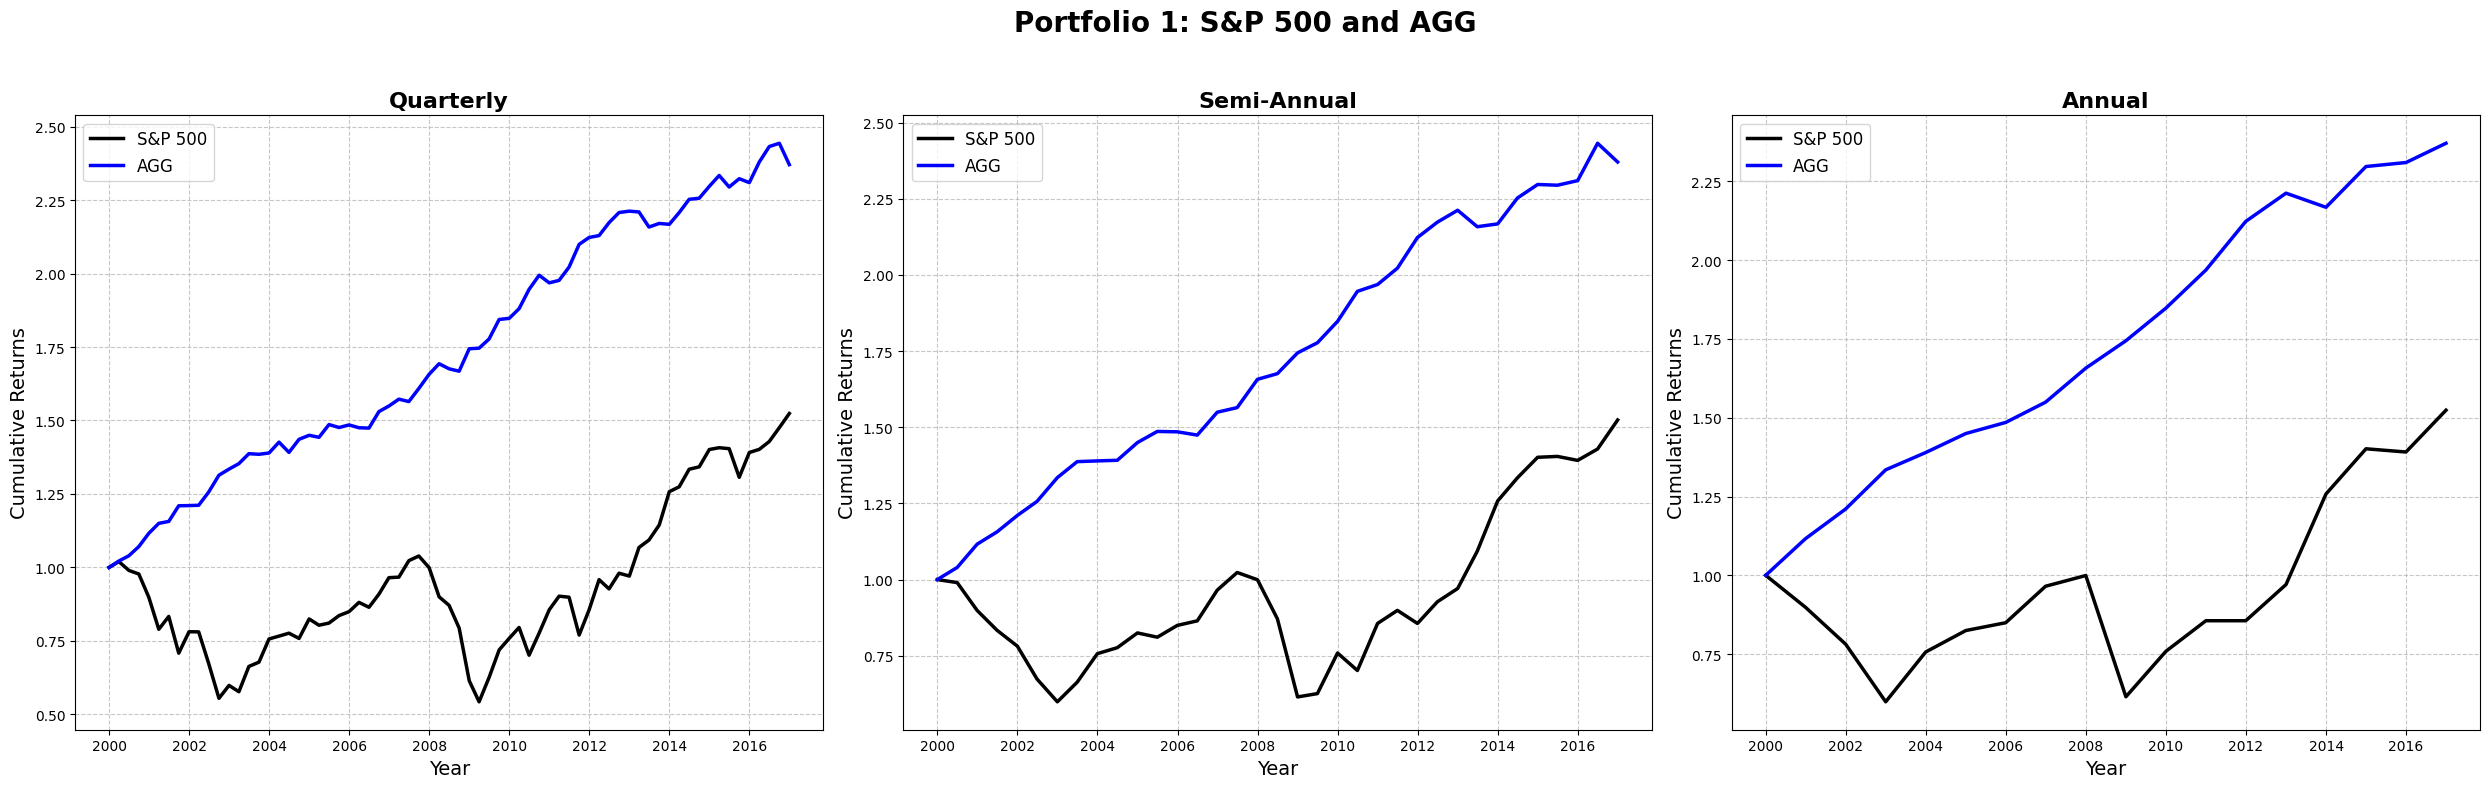

In [ ]:
plot_start_date = '2000-01-01'
plot_end_date = '2016-12-31'

# 数据准备
plot_data_1_quarterly = ptf_1_quarterly.loc[plot_start_date:plot_end_date]
plot_data_1_semi_annual = ptf_1_semi_annual.loc[plot_start_date:plot_end_date]
plot_data_1_annual = ptf_1_annual.loc[plot_start_date:plot_end_date]

# 创建画布
plt.figure(figsize=(25, 8))

# 辅助函数：添加起始点并排序
def add_initial_point(data_series, initial_date):
    initial_series = pd.Series(1, index=[pd.Timestamp(initial_date)])
    return pd.concat([initial_series, data_series]).sort_index()

# Quarterly
plt.subplot(1, 3, 1)
# 计算累积收益
spx_q = (1 + plot_data_1_quarterly['SPXret_1q']).cumprod()
agg_q = (1 + plot_data_1_quarterly['AGGret_1q']).cumprod()
# 添加起始点
spx_q = add_initial_point(spx_q, plot_start_date)
agg_q = add_initial_point(agg_q, plot_start_date)
# 绘图
plt.plot(spx_q, label='S&P 500', linewidth=2.5, color='black')
plt.plot(agg_q, label='AGG', linewidth=2.5, color='blue')
plt.title('Quarterly', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)

# Semi-Annual
plt.subplot(1, 3, 2)
spx_s = (1 + plot_data_1_semi_annual['SPXret_s']).cumprod()
agg_s = (1 + plot_data_1_semi_annual['AGGret_s']).cumprod()
spx_s = add_initial_point(spx_s, plot_start_date)
agg_s = add_initial_point(agg_s, plot_start_date)
plt.plot(spx_s, label='S&P 500', linewidth=2.5, color='black')
plt.plot(agg_s, label='AGG', linewidth=2.5, color='blue')
plt.title('Semi-Annual', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)

# Annual
plt.subplot(1, 3, 3)
spx_a = (1 + plot_data_1_annual['SPXret_a']).cumprod()
agg_a = (1 + plot_data_1_annual['AGGret_a']).cumprod()
spx_a = add_initial_point(spx_a, plot_start_date)
agg_a = add_initial_point(agg_a, plot_start_date)
plt.plot(spx_a, label='S&P 500', linewidth=2.5, color='black')
plt.plot(agg_a, label='AGG', linewidth=2.5, color='blue')
plt.title('Annual', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)

plt.suptitle('Portfolio 1: S&P 500 and AGG', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

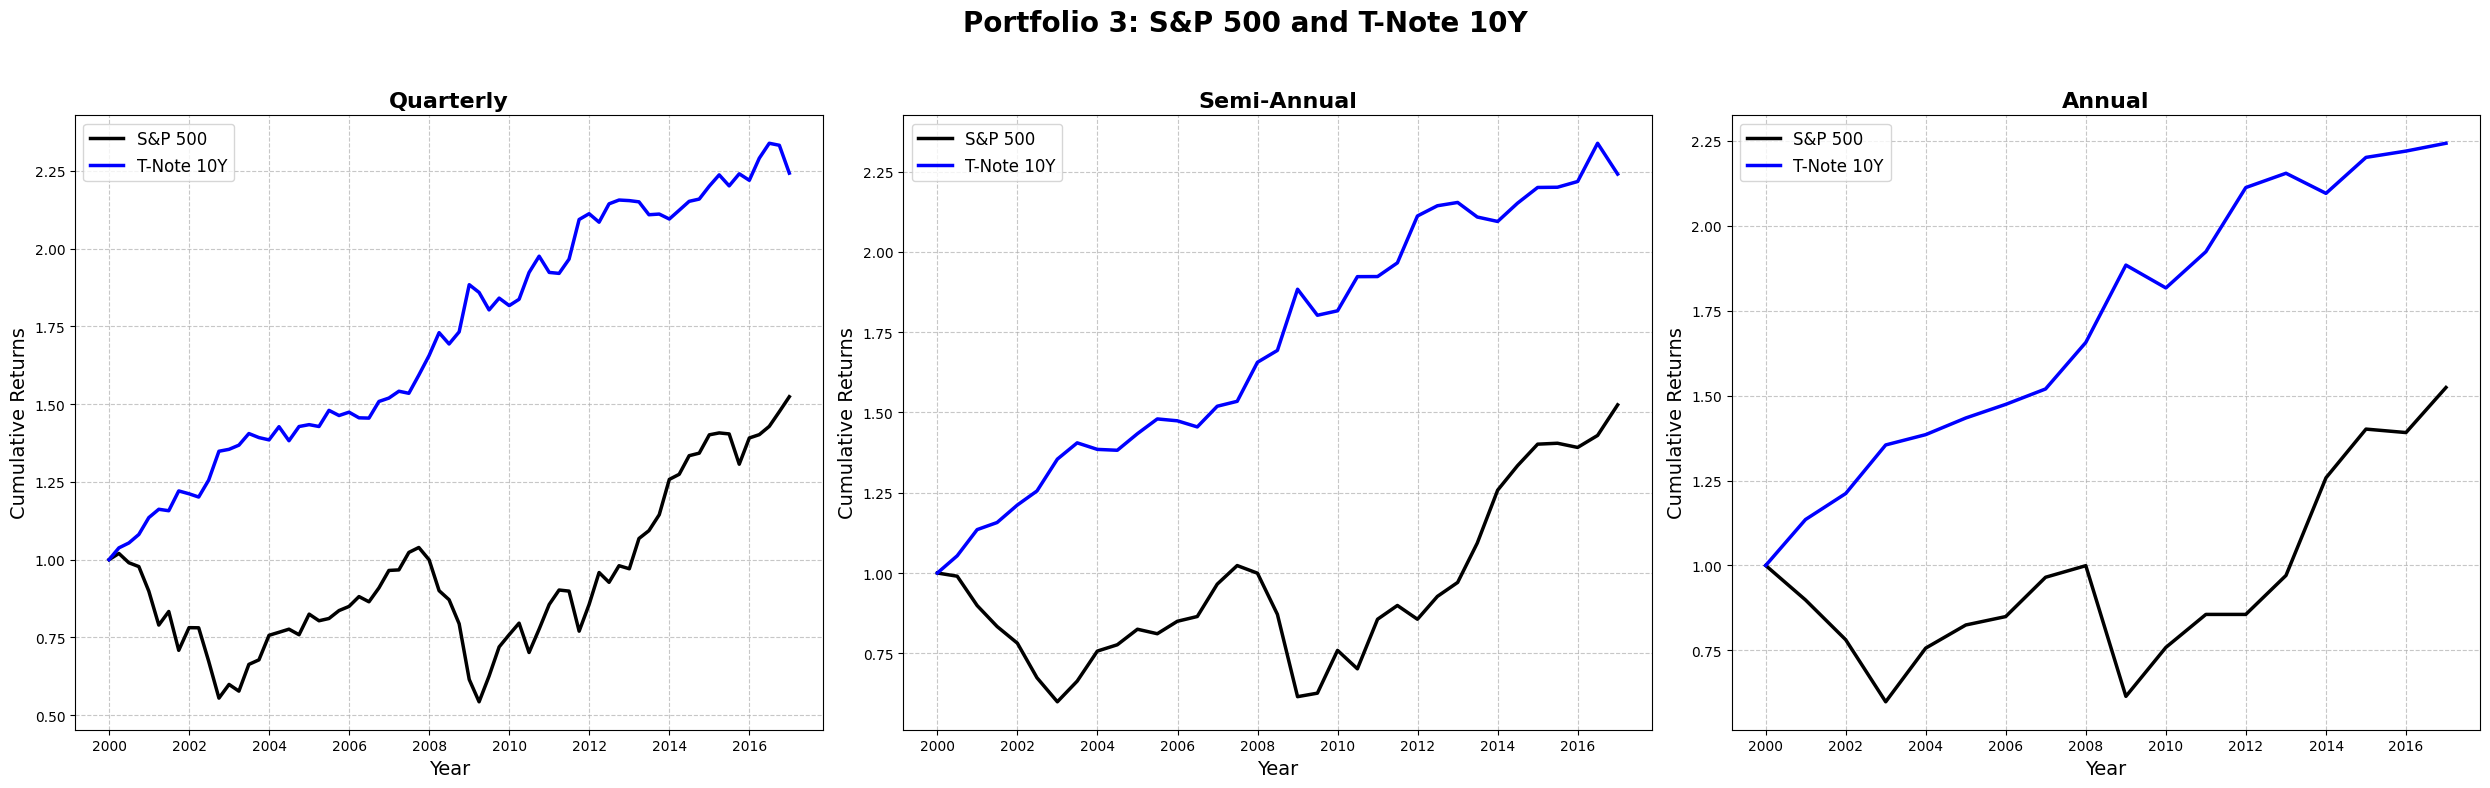

In [117]:
# Portfolio 3: SPX and TNOTE
plot_data_3_quarterly = ptf_3_quarterly.loc[plot_start_date:plot_end_date]
plot_data_3_semi_annual = ptf_3_semi_annual.loc[plot_start_date:plot_end_date]
plot_data_3_annual = ptf_3_annual.loc[plot_start_date:plot_end_date]

plt.figure(figsize=(25, 8))

# Quarterly
plt.subplot(1, 3, 1)
spx_q = (1 + plot_data_3_quarterly['SPXret_1q']).cumprod()
t_note_q = (1 + plot_data_3_quarterly['TNOTEret_1q']).cumprod()
spx_q = add_initial_point(spx_q, plot_start_date)
t_note_q = add_initial_point(t_note_q, plot_start_date)
plt.plot(spx_q, label='S&P 500', linewidth=2.5, color='black')
plt.plot(t_note_q, label='T-Note 10Y', linewidth=2.5, color='blue')
plt.title('Quarterly', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)

# Semi-Annual
plt.subplot(1, 3, 2)
spx_s = (1 + plot_data_3_semi_annual['SPXret_s']).cumprod()
t_note_s = (1 + plot_data_3_semi_annual['TNOTEret_s']).cumprod()
spx_s = add_initial_point(spx_s, plot_start_date)
t_note_s = add_initial_point(t_note_s, plot_start_date)
plt.plot(spx_s, label='S&P 500', linewidth=2.5, color='black')
plt.plot(t_note_s, label='T-Note 10Y', linewidth=2.5, color='blue')
plt.title('Semi-Annual', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)

# Annual
plt.subplot(1, 3, 3)
spx_a = (1 + plot_data_3_annual['SPXret_a']).cumprod()
t_note_a = (1 + plot_data_3_annual['TNOTEret_a']).cumprod()
spx_a = add_initial_point(spx_a, plot_start_date)
t_note_a = add_initial_point(t_note_a, plot_start_date)
plt.plot(spx_a, label='S&P 500', linewidth=2.5, color='black')
plt.plot(t_note_a, label='T-Note 10Y', linewidth=2.5, color='blue')
plt.title('Annual', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)

plt.suptitle('Portfolio 3: S&P 500 and T-Note 10Y', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()